# Data Structures Course 
Shiraz University Fall 2024    
Reza Rezazadegan   
[www.dreamintelligent.com](www.dreamintelligent.com) 

# 3- Sorting and Searching
In the last chapter we saw that sorted arrays give us a more efficient way of implementing the set interface. This is because searching in a sorted array is much faster than linear search in an unsorted array. In this chapter, after reviewing search methods, we examine a few different sorting algorithms and also learn a method for solving recurrences which is useful for computing the cost of recursive algorithms. 

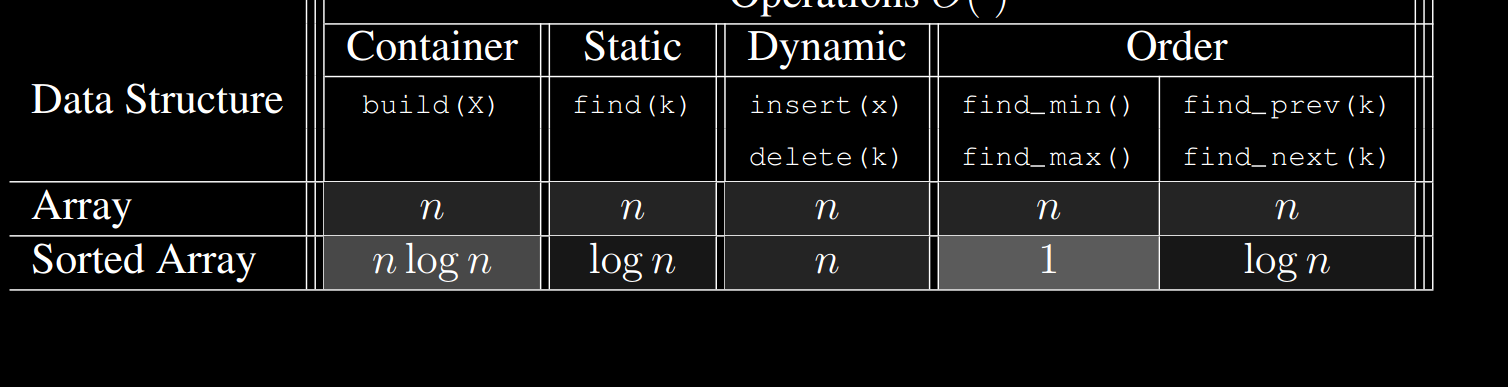

Building a sorted array is more costly compared to an unsorted array, but once the array is sorted, its operations can be done more efficiently.

## Searching

In [3]:
from Array import Array, Dynamic_Array
# Finds the index of the target in theValues, if it exists. If not, returns -1. 
def linearSearch( theValues, target ) :
    n = len( theValues )
    for i in range( n ) :
    # If the target is in the ith element, return True
        if theValues[i] == target:
            return i
    return -1 # If not found, return False.


In [8]:
# Linear search in a sorted array

def sortedLinearSearch( theValues, item ) :
    n = len( theValues )
    for i in range( n ) :
        # If the target is found in the ith element, return True
        if theValues[i] == item :
             return True
        # If target is larger than the ith element, it's not in the sequence.
        elif theValues[i] > item :
            return False

    return False # The item is not in the sequence.

In [1]:
def find_min( theValues ):
    n = len( theValues )
    # Assume the first item is the smallest value.
    smallest = theValues[0]
    # Determine if any other item in the sequence is smaller.
    for i in range( 1, n ) :
        if theValues[i] < smallest :
            smallest = theValues[i]

    return smallest # Return the smallest found.

In [ ]:
# Modified version of the binary search that returns the index within
# a sorted sequence indicating where the target should be located.
def BinarySearchPosition( theList, target ):
    low = 0
    high = len(theList) - 1
    while low <= high :
        mid = (high + low) // 2
        if theList[mid] == target :
            return mid # Index of the target.
        elif target < theList[mid] :
             high = mid - 1
        else :
             low = mid + 1

    return low # Index where the target value should be.


# Sorting

- A sort is **destructive** if it overwrites A (instead of making a new array B that is a sorted 
version of A). 
- A sort is **in place** if it uses O(1) extra space (in place ⊆ destructive) 

If there is no restriction on the extra memory used by the algorithm, a simple sort algorithm is to recursively find the minimum value of the array `A`, append it to the (initially empty) array `sortedA`, and then delete it from `A`. 
Things become a bit more complicated when we want to sort the array in place. 


## Selection sort and insertion sort

- Selection sort maintains and grows a subset of the largest $i$ items in sorted order.   (Sorts the array from the end.)
- Insertion sort maintains and grows a subset of the first $i$ input items in sorted order. (Sorts the array from the beginning.)


## Selection sort

- Starting from $i=n-1$, find a largest number in the prefix A[:i+1] and swap it with A[i].
- Example: [8, 2, 4, 9, 3], [8, 2, 4, 3, 9], [3, 2, 4, 8, 9], [3, 2, 4, 8, 9], [2, 3, 4, 8, 9]

In the following, $T(i), S(i)$ are the time complexity of the `selection_sort` and `prefix_max` functions respectively, for an array of size $i$.

In [1]:
def selection_sort(A, i = None): # T(i)
    '''Sort A[:i + 1]'''
    if i is None: 
        i = len(A) - 1           # O(1)
    
    if i > 0:                    # O(1)
        j = prefix_max(A, i)     # S(i)
        A[i], A[j] = A[j], A[i]  # O(1)
        selection_sort(A, i - 1) # T(i - 1)

def prefix_max(A, i):            # S(i)
    '''Return index of maximum in A[:i + 1]'''
    if i > 0:                    # O(1)
        j = prefix_max(A, i - 1) # S(i - 1)
        if A[i] < A[j]:          # O(1)
            return j             # O(1)
    return i                     # O(1)



# Having already sorted the largest items into sub-array A[i+1:], 
# the algorithm repeatedly scans the array for the largest item not yet sorted and swaps it with item A[i].



In [2]:
selection_sort(Array([ 2,5,4,3,1,8 ]))

NameError: name 'Array' is not defined

In [3]:
selection_sort(Array([5,7,6,4,2,1, 3]))

NameError: name 'Array' is not defined

# Solving Recurrences for computing the complexity of an algorithm
If an algorithm is given recuresively, such as the insertion and selection sort above, its computational complexity can be computed using a recursion. 

- Substitution: Guess a solution and substitute to show the recurrence holds. 
- Recursion Tree: Draw a tree representing the recurrence and sum computation at nodes. This is a very general method.
- Master Theorem: A general formula to solve a large class of recurrences. It is useful, but can also be hard to remember. 



## Analyzing Selection Sort algorithm
### `prefix_max` part: 
#### Correctness
- Base case: for $i = 0$, the array has one element, so the index of max equals $i$. 
- Induction: assume correctness for $i$, the maximum is either the maximum of A[:i] or A[i] itself. 
 It returns correct index in either case. 


#### Efficiency
- $S(1) \in \Theta(1)$, $S(n) = S(n − 1) + \Theta(1)$
- Substitution: $S(n) = \Theta(n)$


- Recurrence tree: chain of n nodes with Θ(1) work per node, $\sum_{i=1}^{n-1}1=\Theta(n)$

### `selection_sort` part: 
#### Correctness
- Base case: for $i = 0$, the array has one element and so is sorted. 
- Induction: assume correct for $i$, last number of a sorted output is a largest number of the array, and the algorithm puts one there; then A[:i] is sorted by induction. 

#### Efficiency
- $T(1) \in \Theta(1)$, $T(n) = T(n − 1) + \Theta(n)$
- Substitution: $T(n)\in\Theta(\sum_{i=0}^{n-1} i) \in \Theta(n^2)$
- Recurrence tree: chain of n nodes with Θ(i) work per node, $\Sigma_{i=0}^{n-1} i = Θ(n^2)$

## Insertion Sort
- Recursively sort prefix A[:i]
- Sort the prefix A[:i + 1] assuming that A[:i] is already sorted by repeated swaps. 
- Example: [8, 2, 4, 9, 3], [2, 8, 4, 9, 3], [2, 4, 8, 9, 3], [2, 4, 8, 9, 3], [2, 3, 4, 8, 9]


In [3]:
def insertion_sort(A, i = None):            # T(i)
    '''Sort A[:i + 1]'''
    if i is None: i = len(A) - 1            # O(1)
    if i > 0:                               # O(1)
        insertion_sort(A, i - 1)            # T(i - 1)
        A.insert_last( i)                   # S(i)

def insert_last(A, i):                  # S(i)
    '''Sort A[:i + 1] assuming sorted A[:i]'''
    if i > 0 and A[i] < A[i - 1]:       # O(1)
        A[i], A[i - 1] = A[i - 1], A[i] # O(1)
        A.insert_last( i - 1)           # S(i - 1)






An example of how insertion sort works
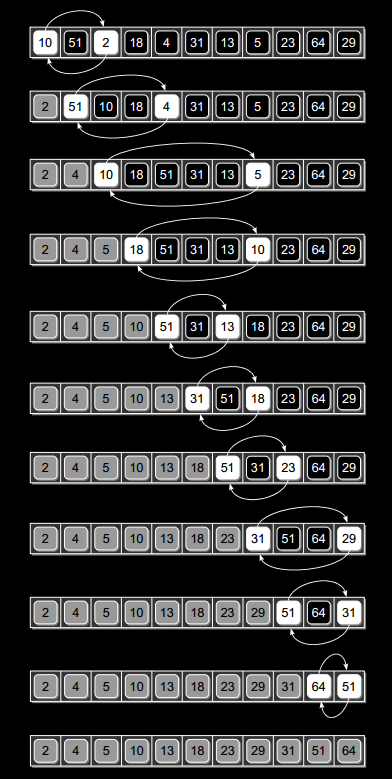

In [1]:
from Array import Array
A=Array()
A.build([7,6,5,4,3,2,1])
#insertion_sort(A)

## Analyzing Insertion Sort algorithm
### `insert_last` part:
#### Correctness
- Base case: for i = 0, array has one element so is sorted 
- Induction: assume correct for i, if A[i] >= A[i - 1], array is sorted; otherwise, 
swapping last two elements allows us to sort A[:i] by induction 
#### Efficiency
- S(1) = Θ(1), S(n) = S(n − 1) + Θ(1) ⇒ $S(n) \in Θ(n)$

### `insertion_sort` part: 
#### Correctness
- Base case: for i = 0, array has one element so is sorted  
- Induction: assume correct for i, algorithm sorts A[:i] by induction, and then insert last correctly sorts the rest as proved above 
#### Efficiency
- $T(1) = Θ(1)$, $T(n) = T(n − 1) + Θ(n) ⇒ T(n) \in Θ(n^2)$

Insertion sort is **stable**, meaning 
that items having the same value will appear in the sort in the same order as they appeared in the 
input array. By comparison, this implementation of selection sort is not stable. For example, the 
input (2, 1, 10) would produce the output (10, 1, 2). 

## Merge Sort
The algorithm recursively sorts the left and right half of the array, and then merges the 
two halves in linear time. 

### Merging two sorted arrays
Imagine `A,B` are two arrays which are already sorted, we want an algorithm which gives us a new array `C` which is obtained by merging `A,B` and is sorted.

In [ ]:
# Merges two sorted lists to create and return a new sorted list.
def mergeSortedArrays( listA, listB ) :
    # Create the new list and initialize the list markers.
    newList = Array()
    a = 0
    b = 0 
    # Merge the two lists together until one is empty.
    while a < len( listA ) and b < len( listB ) :
        if listA[a] < listB[b] :
            newList.append( listA[a] )
            print(listA[a], "from list A")
            a += 1
            
        else :
            newList.append( listB[b] )
            print(listB[b], "from list B")
            b += 1
            

    # If listA contains more items, append them to newList.
    while a < len( listA ) :
        newList.append( listA[a] )
        a += 1

    # Or if listB contains more items, append them to newList.
    while b < len( listB ) :
        newList.append( listB[b] )
        b += 1

    return newList


In [ ]:
mergeSortedLists([1,3,5,8 ], [2,2,6,9])



Recursively sort first half and second half (may assume power of two) 
• Merge the sorted halves into one sorted list 
• Example: [7, 1, 5, 6, 2, 4, 9, 3], [1, 7, 5, 6, 2, 4, 3, 9], [1, 5, 6, 7, 2, 3, 4, 9], [1, 2, 3, 4, 5, 6, 7, 9]


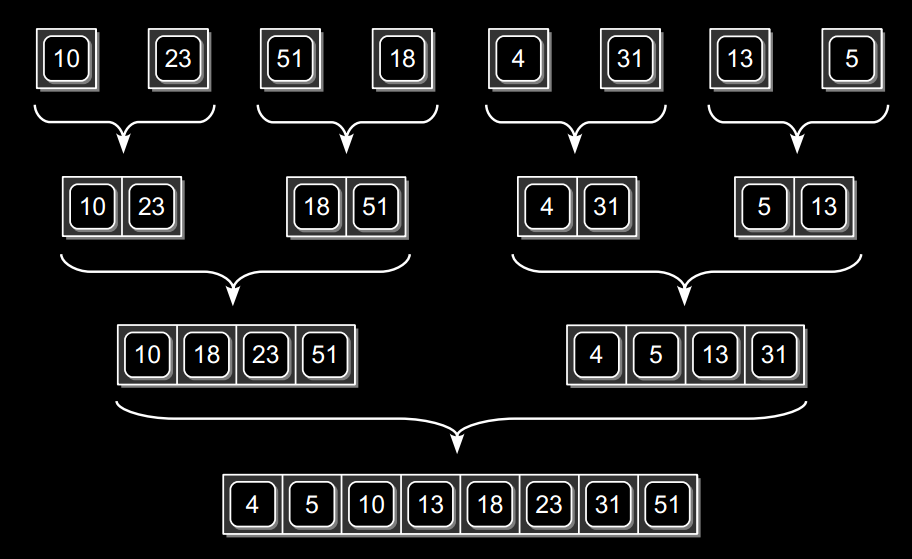

In [1]:
def merge_sort(A, a = 0, b = None): # T(b - a = n)
    '''Sort A[a:b]'''
    if b is None: 
        b = len(A)                  # O(1)
        
    if 1 < b - a:                   # O(1)
        c = (a + b + 1) // 2        # O(1)
        merge_sort(A, a, c)         # T(n / 2)
        merge_sort(A, c, b)         # T(n / 2)
        L, R = A[a:c], A[c:b]       # O(n)
        merge(L, R, A, len(L), len(R), a, b) # S(n)

def merge(L, R, A, i, j, a, b):                         # S(b - a = n)
    '''Merge sorted L[:i] and R[:j] into A[a:b]'''
    if a < b:                                           # O(1)
        # What should A[b-1] be?
        if (j <= 0) or (i > 0 and L[i - 1] > R[j - 1]): # O(1)
            A[b - 1] = L[i - 1]                         # O(1)
            i = i - 1                                   # O(1)
        else:                                               # O(1)
            A[b - 1] = R[j - 1]                             # O(1)
            j = j - 1                                       # O(1)

        merge(L, R, A, i, j, a, b - 1)                      # S(n - 1)





IndentationError: expected an indented block (1757894627.py, line 2)

## Analyzing Merge Sort algorithm
### `merge` part: 
#### Correctness
- Base case: for n = 0, arrays are empty, so vacuously correct. 
- Induction: assume correct for n, A[r] must be a largest number from remaining prefixes of L and R, and since they are sorted, taking largest of last items suffices; remainder is merged by induction. 


#### Efficiency
- $S(0) = Θ(1)$, $S(n) = S(n − 1) + Θ(1) ⇒ S(n) \in Θ(n)$


### `merge_sort` part: 
#### Correctness
- Base case: for n = 1, array has one element so is sorted 
- Induction: assume correct for k < n, algorithm sorts smaller halves by induction, and then merge merges into a sorted array as proved above. 

#### Efficiency
- $T(1) = Θ(1), T(n) = 2T(n/2) + Θ(n)$

- Substitution: Guess $T(n) = Θ(n \log n)$   


- Recurrence Tree: complete binary tree with depth $\log_2 n$ and n leaves, level i has $2^i$
 nodes with $O(n/2^i)$ work each, total: $\sum_{i=0}^{\log_2 n} (2^i)(n/2^i) = Θ(n \log n)$

Merge sort uses a linear amount of temporary storage (temp) when combining the two halves, so it is not in-place. 

Whether merge sort is stable depends on how an implementation breaks ties when merging. The above implementation is not stable, but it can be made stable with only a small modification. 


The recurrence relation for merge sort is then $T(n) = 2T(n/2) + \Theta(n)$, which solves to $T(n) = \Theta(n \log n)$. 
An $\Theta(n \log n)$ asymptotic growth rate is much closer to linear than quadratic, as log n grows exponentially slower than n. In particular, $\log n$ grows slower than any polynomial $n^\epsilon$ for ε > 0. 

The recursion tree for the Merge Sort algorithm:
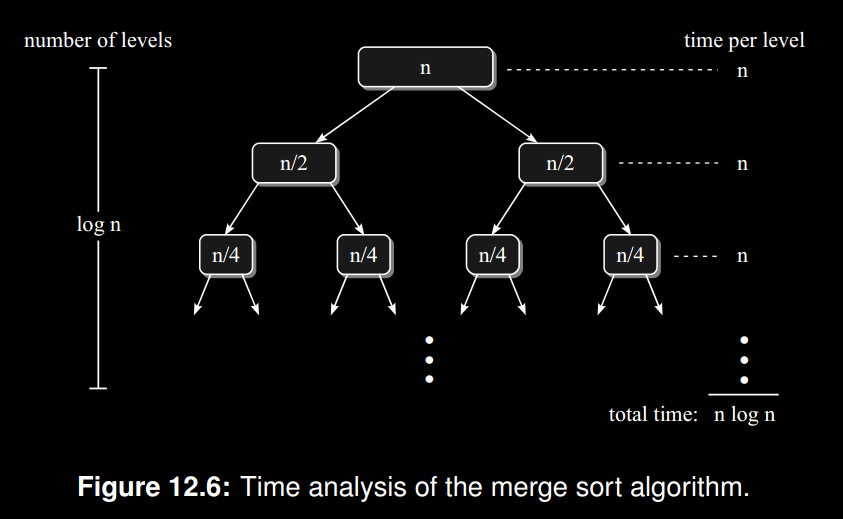

## Recursion trees for recurrences
In the last section we saw the recurrence tree for the Merge Sort Algorithm. A general recursion tree tells us how a recursive function is executed and helps us to estimat the computational complexity of the function.  
For example consider the recursion $T(n) = 3T(n/4) + cn^2$.

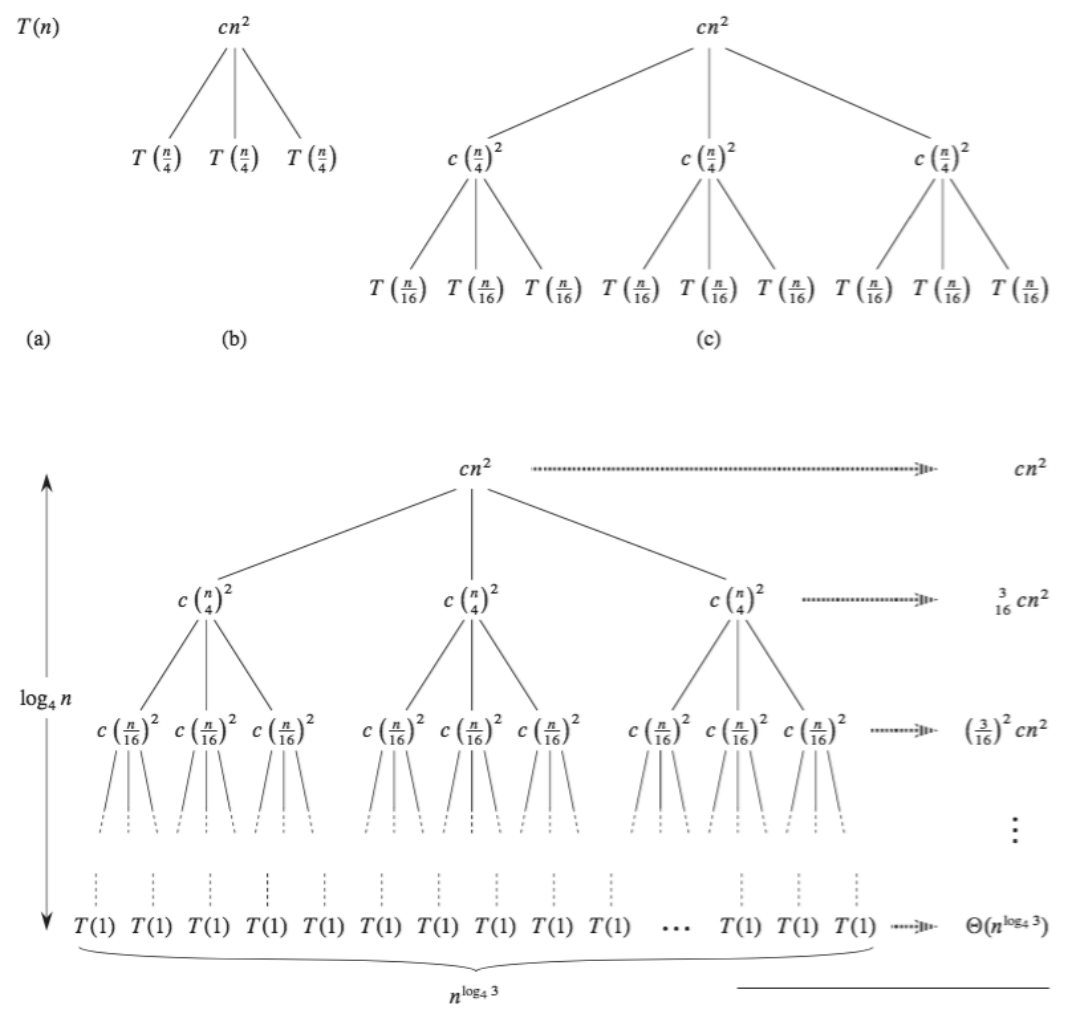


The total sum of the values on the nodes of the tree is

$$T(n)=\sum_{i=0}^{(\log_4 n) -1} (3/16)^i cn^2+ \Theta(3^{\log_4 n}).$$
The last term corresponds to the leaves of the tree and the sum corresponds to the internal nodes. 
This is bounded above by the sum of the corresponding geometric series which equals 
$$\frac{1}{1-3/16}cn^2+\Theta(n^{\log_4 3})\in O(n^2)$$

Therefore $T(n)\in O(n^2)$. 

## The Master theorem for recurrences
The Master Theorem provides a way to solve recurrence relations in which recursive calls decrease problem size by a constant factor. Given a recurrence relation of the form 
$$T(n) = aT(n/b)+f(n)$$
 and $T(1) = \Theta(1)$, with 
- _branching factor_ a ≥ 1, 
- _problem size reduction factor_ b > 1, and 
- asymptotically non-negative function $f(n)$, 


The Master Theorem gives the solution to the recurrence by comparing f(n) to $a^{\log_b n}=n^{\log_b a}$, the number of leaves at the bottom of the recursion tree. 

When f(n) grows asymptotically faster than $n^{\log_b a}$, the work done at each level decreases 
geometrically so the work at the root dominates; alternatively, when f(n) grows slower, the work 
done at each level increases geometrically and the work at the leaves dominates. When their growth 
rates are comparable, the work is evenly spread over the tree’s $O(\log n)$ levels. 

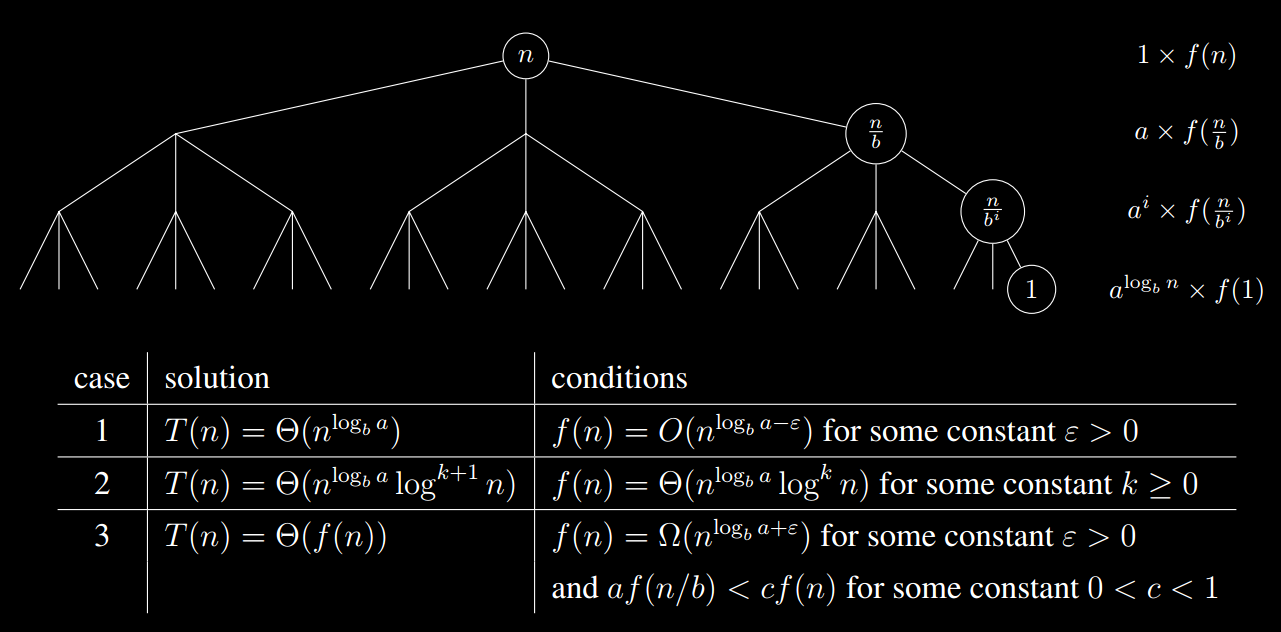



The Master Theorem takes on a simpler form when f(n) is a polynomial, such that the recurrence 
has the from $$T(n) = aT(n/b) + Θ(n^c)$$ for some constant c ≥ 0. 

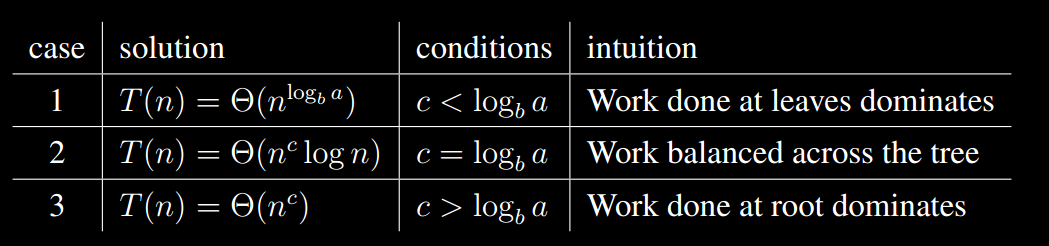

This special case is straight-forward to prove by substitution. 

To apply the Master Theorem (or this simpler special case), you should state which case applies, and show that your recurrence relation satisfies all conditions required by the relevant case. 


# Exercises
1- The bubble sort algorithm is given below.  
1-1- Run these algorithm "by hand" for the array [8, 2, 4, 9, 3] and record `i,j` and the array at each iteration.   
1-2- Prove that this algorithm indeed sorts the array it receives.  
1-3- Show that the number of iterations in Bubble Sort algorithm is independent of the values in the list and only depends on the length of the list.  
1-4- Modify this code so that bubble sort's outer loop stops whenever the array is sorted.  


In [ ]:
# Sorts a sequence in ascending order using the bubble sort algorithm.
def bubbleSort( theSeq ):
    n = len( theSeq )
        
    # Perform n-1 bubble operations on the sequence
    #In the iteration i, the i'th largest element is "bubbled" to the end of the list
    for i in range( n - 1 ) :
        # Bubble the largest item to the end.
    
        for j in range( -i + n - 1 ) :
            
            if theSeq[j] > theSeq[j + 1] : # swap the j and j+1 items.
                tmp = theSeq[j]
                theSeq[j] = theSeq[j + 1]
                theSeq[j + 1] = tmp
        

            

2- Write the selection sort and insertion sort algorithms, each in one funtion and without using recursive functions. Explain why your results do the same thing as the impementations we saw above.  

3- Implement a sort algorithm which does not modify the original array, returns a new array which is the sorted version of the input array and works in $O(n^2)$, and uses no additional memory.

4- Prove the special case of Mater Theorem (for polynomial $f(n)$). 

5- Given an unsorted list of $n$ values, what is the time-complexity to find the $k$'th smallest value in the worst case? What would be the complexity if the list was sorted?

6- Draw the recursion tree and then solve this recurrence, assuming $T(1)\in \Theta(1)$.
-  T(n) = T(2n/3) + O(1)

7- Draw the recursion tree and then solve this recurrence, assuming $T(1)\in \Theta(1)$.
-  T(n) = 2T(n/2) + O(1)

8- Determine the number of comparisons and swaps in insertion sort, in the worst case. 